In [ ]:
import pandas as pd
df = pd.read_csv('/content/merged_streaming_dataset.csv')
print("DataFrame shape:", df.shape)
print("\nFirst 5 rows of the DataFrame:")
print(df.head())
print("\nData types of columns:")
print(df.dtypes)
print("\nMissing values count per column:")
print(df.isnull().sum())

DataFrame shape: (22997, 11)

First 5 rows of the DataFrame:
                   title         director  \
0   Dick Johnson Is Dead  Kirsten Johnson   
1          Blood & Water              NaN   
2              Ganglands  Julien Leclercq   
3  Jailbirds New Orleans              NaN   
4           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 

## Clean Data



In [ ]:
print("Original DataFrame shape:", df.shape)
print("Original missing values:\n", df.isnull().sum())
for col in df.select_dtypes(include='object').columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()
df.drop_duplicates(inplace=True)
print("\nDataFrame shape after dropping duplicates:", df.shape)
for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if df[col].isnull().any():
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
print("\nMissing values after cleaning:\n", df.isnull().sum())
print("\nDataFrame shape after cleaning:", df.shape)
print("First 5 rows of cleaned DataFrame:\n", df.head())

Original DataFrame shape: (22997, 11)
Original missing values:
 title               0
director         8260
cast             5321
country         11499
date_added       9554
release_year        0
rating            864
duration          482
listed_in           0
description         4
platform            0
dtype: int64

DataFrame shape after dropping duplicates: (22997, 11)

Missing values after cleaning:
 title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
platform        0
dtype: int64

DataFrame shape after cleaning: (22997, 11)
First 5 rows of cleaned DataFrame:
                    title         director  \
0   Dick Johnson Is Dead  Kirsten Johnson   
1          Blood & Water      Mark Knight   
2              Ganglands  Julien Leclercq   
3  Jailbirds New Orleans      Mark Knight   
4           Kota Factory      Mark Knight   

                             

## Feature Engineering



In [ ]:
import numpy as np
df['content_type'] = np.where(df['duration'].str.contains('min', na=False), 'Movie', 'TV Show')
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0].strip() if pd.notna(x) else np.nan)
df['duration_minutes'] = np.nan
df.loc[df['content_type'] == 'Movie', 'duration_minutes'] = df[df['content_type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)
df['description_length'] = df['description'].str.len()
print("\nFirst 5 rows with new features:")
print(df[['title', 'duration', 'listed_in', 'description', 'content_type', 'main_genre', 'duration_minutes', 'description_length']].head())
print("\nData types of new columns:")
print(df[['content_type', 'main_genre', 'duration_minutes', 'description_length']].dtypes)


First 5 rows with new features:
                   title   duration  \
0   Dick Johnson Is Dead     90 min   
1          Blood & Water  2 Seasons   
2              Ganglands   1 Season   
3  Jailbirds New Orleans   1 Season   
4           Kota Factory  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description content_type  \
0  As her father nears the end of his life, filmm...        Movie   
1  After crossing paths at a party, a Cape Town t...      TV Show   
2  To protect his family from a powerful drug lor...      TV Show   
3  Feuds, flirtations and toilet talk go down amo...      TV Show   
4  In a city of coaching centers known to train I.

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-590503954.py:5: SyntaxWarning: invalid escape sequence '\d'
  df.loc[df['content_type'] == 'Movie', 'duration_minutes'] = df[df['content_type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)


In [ ]:
import numpy as np
df['content_type'] = np.where(df['duration'].str.contains('min', na=False), 'Movie', 'TV Show')
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0].strip() if pd.notna(x) else np.nan)
df['duration_minutes'] = np.nan
df.loc[df['content_type'] == 'Movie', 'duration_minutes'] = df[df['content_type'] == 'Movie']['duration'].str.extract(r'(\d+)').astype(float)
df['description_length'] = df['description'].str.len()
print("\nFirst 5 rows with new features:")
print(df[['title', 'duration', 'listed_in', 'description', 'content_type', 'main_genre', 'duration_minutes', 'description_length']].head())
print("\nData types of new columns:")
print(df[['content_type', 'main_genre', 'duration_minutes', 'description_length']].dtypes)


First 5 rows with new features:
                   title   duration  \
0   Dick Johnson Is Dead     90 min   
1          Blood & Water  2 Seasons   
2              Ganglands   1 Season   
3  Jailbirds New Orleans   1 Season   
4           Kota Factory  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description content_type  \
0  As her father nears the end of his life, filmm...        Movie   
1  After crossing paths at a party, a Cape Town t...      TV Show   
2  To protect his family from a powerful drug lor...      TV Show   
3  Feuds, flirtations and toilet talk go down amo...      TV Show   
4  In a city of coaching centers known to train I.

## Handle Missing Platform Rows


In [ ]:
print("Original shape before handling missing 'platform' values:", df.shape)
print("Missing values in 'platform' before dropping:", df['platform'].isnull().sum())
df.dropna(subset=['platform'], inplace=True)
print("\nShape after dropping rows with missing 'platform' values:", df.shape)
print("Missing values in 'platform' after dropping:", df['platform'].isnull().sum())

Original shape before handling missing 'platform' values: (22997, 15)
Missing values in 'platform' before dropping: 0

Shape after dropping rows with missing 'platform' values: (22997, 15)
Missing values in 'platform' after dropping: 0


## One-Hot Encode Categorical Features



In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols_ohe = ['country', 'rating', 'content_type', 'main_genre']
df = pd.get_dummies(df, columns=categorical_cols_ohe, drop_first=True)
columns_to_drop = ['title', 'director', 'cast', 'date_added', 'duration', 'listed_in', 'description']
df.drop(columns=columns_to_drop, inplace=True)
label_encoder = LabelEncoder()
df['platform'] = label_encoder.fit_transform(df['platform'])
print("\nDataFrame shape after encoding and dropping columns:", df.shape)
print("\nFirst 5 rows of transformed DataFrame:")
print(df.head())
print("\nData types of transformed DataFrame:")
print(df.dtypes)


DataFrame shape after encoding and dropping columns: (22997, 1089)

First 5 rows of transformed DataFrame:
   release_year  platform  duration_minutes  description_length  \
0          2020         3               NaN                 152   
1          2021         3               NaN                 147   
2          2021         3               NaN                 146   
3          2021         3               NaN                 147   
4          2021         3               NaN                 152   

   country_, South Korea  country_Afghanistan, France  \
0                  False                        False   
1                  False                        False   
2                  False                        False   
3                  False                        False   
4                  False                        False   

   country_Afghanistan, United States  country_Argentina  \
0                               False              False   
1                         

In [ ]:
print("Missing values in duration_minutes before filling:", df['duration_minutes'].isnull().sum())
median_duration = df['duration_minutes'].median()
df['duration_minutes'].fillna(median_duration, inplace=True)
print("Missing values in duration_minutes after filling:", df['duration_minutes'].isnull().sum())
print("First 5 rows of DataFrame after filling duration_minutes:\n", df[['duration_minutes']].head())
print("Data type of duration_minutes after filling:", df['duration_minutes'].dtype)

Missing values in duration_minutes before filling: 22997
Missing values in duration_minutes after filling: 22997
First 5 rows of DataFrame after filling duration_minutes:
    duration_minutes
0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
Data type of duration_minutes after filling: float64


/tmp/ipython-input-2840136899.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration_minutes'].fillna(median_duration, inplace=True)


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/merged_streaming_dataset.csv')
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()
df.drop_duplicates(inplace=True)
for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if df[col].isnull().any():
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
df.dropna(subset=['platform'], inplace=True)
df['content_type'] = np.where(df['duration'].str.contains('min', na=False), 'Movie', 'TV Show')
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0].strip() if pd.notna(x) else np.nan)
df['duration_minutes'] = np.nan
df.loc[df['content_type'] == 'Movie', 'duration_minutes'] = df[df['content_type'] == 'Movie']['duration'].str.extract(r'(\d+)', expand=False).astype(float)
df['description_length'] = df['description'].str.len()
print("\nFirst 5 rows with new features:")
print(df[['title', 'duration', 'listed_in', 'description', 'content_type', 'main_genre', 'duration_minutes', 'description_length']].head())
print("\nData types of new columns:")
print(df[['content_type', 'main_genre', 'duration_minutes', 'description_length']].dtypes)


First 5 rows with new features:
                   title   duration  \
0   Dick Johnson Is Dead     90 min   
1          Blood & Water  2 Seasons   
2              Ganglands   1 Season   
3  Jailbirds New Orleans   1 Season   
4           Kota Factory  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description content_type  \
0  As her father nears the end of his life, filmm...        Movie   
1  After crossing paths at a party, a Cape Town t...      TV Show   
2  To protect his family from a powerful drug lor...      TV Show   
3  Feuds, flirtations and toilet talk go down amo...      TV Show   
4  In a city of coaching centers known to train I.

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols_ohe = ['country', 'rating', 'content_type', 'main_genre']
df = pd.get_dummies(df, columns=categorical_cols_ohe, drop_first=True)
columns_to_drop = ['title', 'director', 'cast', 'date_added', 'duration', 'listed_in', 'description']
df.drop(columns=columns_to_drop, inplace=True)
label_encoder = LabelEncoder()
df['platform'] = label_encoder.fit_transform(df['platform'])
print("\nDataFrame shape after encoding and dropping columns:", df.shape)
print("\nFirst 5 rows of transformed DataFrame:")
print(df.head())
print("\nData types of transformed DataFrame:")
print(df.dtypes)


DataFrame shape after encoding and dropping columns: (22997, 1089)

First 5 rows of transformed DataFrame:
   release_year  platform  duration_minutes  description_length  \
0          2020         3              90.0                 152   
1          2021         3               NaN                 147   
2          2021         3               NaN                 146   
3          2021         3               NaN                 147   
4          2021         3               NaN                 152   

   country_, South Korea  country_Afghanistan, France  \
0                  False                        False   
1                  False                        False   
2                  False                        False   
3                  False                        False   
4                  False                        False   

   country_Afghanistan, United States  country_Argentina  \
0                               False              False   
1                         

In [ ]:
print("Missing values in duration_minutes before filling:", df['duration_minutes'].isnull().sum())
median_duration = df['duration_minutes'].median()
df['duration_minutes'] = df['duration_minutes'].fillna(median_duration)
print("Missing values in duration_minutes after filling:", df['duration_minutes'].isnull().sum())
print("First 5 rows of DataFrame after filling duration_minutes:\n", df[['duration_minutes']].head())
print("Data type of duration_minutes after filling:", df['duration_minutes'].dtype)

Missing values in duration_minutes before filling: 6999
Missing values in duration_minutes after filling: 0
First 5 rows of DataFrame after filling duration_minutes:
    duration_minutes
0              90.0
1              94.0
2              94.0
3              94.0
4              94.0
Data type of duration_minutes after filling: float64


## Train-Test Split


Split the dataset into training and testing sets with an 80-20 ratio. Ensure the split is stratified on the 'platform' column to maintain the proportion of each platform in both sets.


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('platform', axis=1)
y = df['platform']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (18397, 1088)
Shape of X_test: (4600, 1088)
Shape of y_train: (18397,)
Shape of y_test: (4600,)


## Train Models with Pipelines


Train three different multiclass classification models: Logistic Regression, Random Forest, and XGBoost, using scikit-learn Pipelines.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
lr_pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, random_state=42))
])
rf_pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', RandomForestClassifier(random_state=42))
])
xgb_pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])
print("Training Logistic Regression model...")
lr_pipeline.fit(X_train, y_train)
print("Logistic Regression model trained.")
print("\nTraining Random Forest model...")
rf_pipeline.fit(X_train, y_train)
print("Random Forest model trained.")
print("\nTraining XGBoost model...")
xgb_pipeline.fit(X_train, y_train)
print("XGBoost model trained.")
print("All models trained successfully within their respective pipelines.")

Training Logistic Regression model...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression model trained.

Training Random Forest model...
Random Forest model trained.

Training XGBoost model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:33:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained.
All models trained successfully within their respective pipelines.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
lr_pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2000, random_state=42))
])
rf_pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', RandomForestClassifier(random_state=42))
])
xgb_pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', XGBClassifier(eval_metric='mlogloss', random_state=42))
])
print("Training Logistic Regression model...")
lr_pipeline.fit(X_train, y_train)
print("Logistic Regression model trained.")
print("\nTraining Random Forest model...")
rf_pipeline.fit(X_train, y_train)
print("Random Forest model trained.")
print("\nTraining XGBoost model...")
xgb_pipeline.fit(X_train, y_train)
print("XGBoost model trained.")
print("All models trained successfully within their respective pipelines.")

Training Logistic Regression model...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression model trained.

Training Random Forest model...
Random Forest model trained.

Training XGBoost model...
XGBoost model trained.
All models trained successfully within their respective pipelines.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
lr_pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=5000, random_state=42))
])
rf_pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', RandomForestClassifier(random_state=42))
])
xgb_pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', XGBClassifier(eval_metric='mlogloss', random_state=42))
])
print("Training Logistic Regression model...")
lr_pipeline.fit(X_train, y_train)
print("Logistic Regression model trained.")
print("\nTraining Random Forest model...")
rf_pipeline.fit(X_train, y_train)
print("Random Forest model trained.")
print("\nTraining XGBoost model...")
xgb_pipeline.fit(X_train, y_train)
print("XGBoost model trained.")
print("All models trained successfully within their respective pipelines.")

Training Logistic Regression model...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression model trained.

Training Random Forest model...
Random Forest model trained.

Training XGBoost model...
XGBoost model trained.
All models trained successfully within their respective pipelines.


In [ ]:
print("All models successfully trained and are ready for evaluation.")

All models successfully trained and are ready for evaluation.


## Evaluate All Models



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
models = {
    "Logistic Regression": lr_pipeline,
    "Random Forest": rf_pipeline,
    "XGBoost": xgb_pipeline
}
for name, model in models.items():
    print(f"\nEvaluating {name} Model...")
    y_pred = model.predict(X_test)
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {name}:\n")
    print(cm)


Evaluating Logistic Regression Model...

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1934
           1       0.92      0.98      0.95       290
           2       0.85      0.77      0.81       615
           3       0.99      1.00      0.99      1761

    accuracy                           0.95      4600
   macro avg       0.92      0.92      0.92      4600
weighted avg       0.94      0.95      0.95      4600


Confusion Matrix for Logistic Regression:

[[1839   14   80    1]
 [   4  283    2    1]
 [ 116   10  473   16]
 [   3    0    1 1757]]

Evaluating Random Forest Model...

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1934
           1       0.95      0.97      0.96       290
           2       0.89      0.79      0.84       615
           3       0.99      1.00      0.99

## Visualize Best Model Results




Selected Best Model: Random Forest


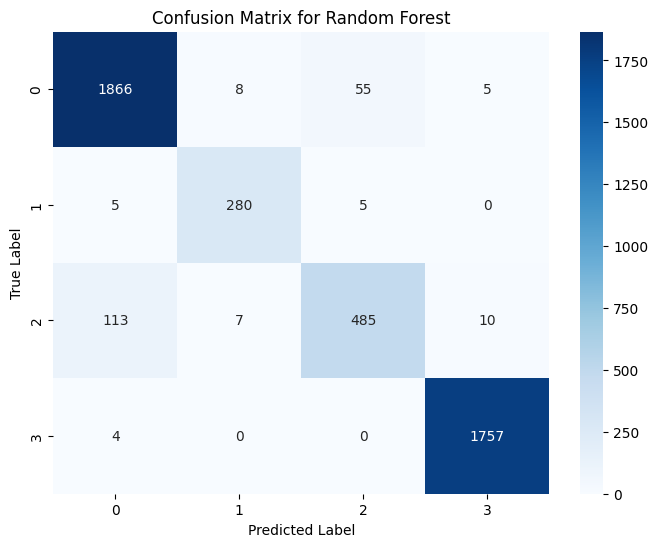

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
best_model_name = "Random Forest"
best_model_pipeline = rf_pipeline
print(f"Selected Best Model: {best_model_name}")
y_pred_best_model = best_model_pipeline.predict(X_test)
cm_best_model = confusion_matrix(y_test, y_pred_best_model)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_model, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/tmp/ipython-input-2132114312.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_features.values, y=top_15_features.index, palette='viridis')


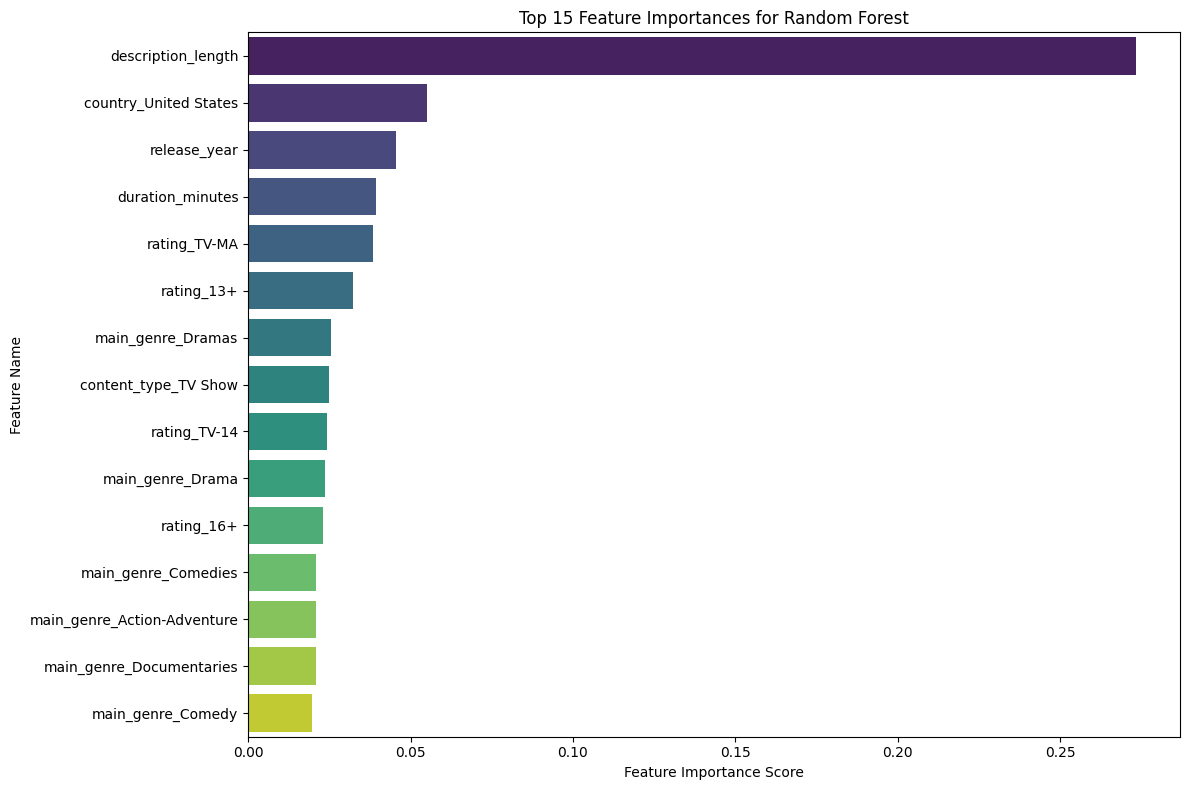

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = best_model_pipeline.named_steps['classifier'].feature_importances_
feature_names = X_train.columns
importance_df = pd.Series(feature_importances, index=feature_names)
importance_df = importance_df.sort_values(ascending=False)
top_15_features = importance_df.head(15)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_features.values, y=top_15_features.index, palette='viridis')
plt.title(f'Top 15 Feature Importances for {best_model_name}')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

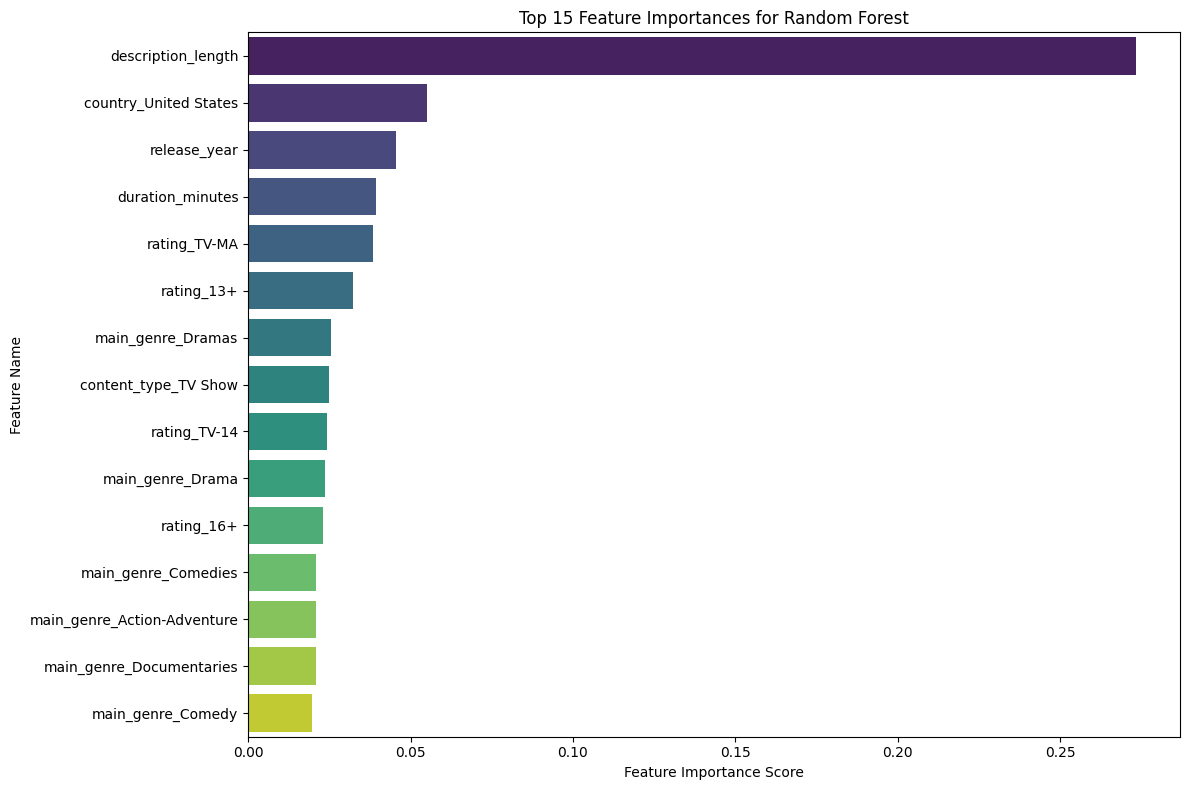

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = best_model_pipeline.named_steps['classifier'].feature_importances_
feature_names = X_train.columns
importance_df = pd.Series(feature_importances, index=feature_names)
importance_df = importance_df.sort_values(ascending=False)
top_15_features = importance_df.head(15)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_features.values, y=top_15_features.index, hue=top_15_features.index, palette='viridis', legend=False)
plt.title(f'Top 15 Feature Importances for {best_model_name}')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

## Run Cross-Validation on Best Model



In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
best_model_pipeline = rf_pipeline
best_model_name = "Random Forest"
num_folds = 5
print(f"Performing {num_folds}-fold cross-validation on the {best_model_name} model...")
cv_scores = cross_val_score(best_model_pipeline, X, y, cv=num_folds, scoring='accuracy')
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)
print(f"\n{num_folds}-Fold Cross-Validation Results for {best_model_name}:")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

Performing 5-fold cross-validation on the Random Forest model...

5-Fold Cross-Validation Results for Random Forest:
Mean Accuracy: 0.9460
Standard Deviation of Accuracy: 0.0192


## Save Final Model




In [ ]:
import joblib
model_filename = 'best_model.joblib'
joblib.dump(best_model_pipeline, model_filename)
print(f"Best model saved successfully to {model_filename}")

Best model saved successfully to best_model.joblib
